In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [2]:
#import cleaned data
df=pd.read_csv('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/FinanceData/Dataset',index_col=0)

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=16,8
df.head(2)

,DGS30,DGS10,DGS2,UNRATE,BAMLH0A0HYM2,CSUSHPINSA,MORTGAGE30US,SP500,NASDAQCOM,MSCIEM,MSCIEAFE,DJIA,RealGDP,BAMLC0A3CA,USDXY,VIX,DGS5,FEDFUNDS,inflation
1914-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3
1915-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9


In [4]:
#convert index to datetime
df.index=pd.to_datetime(df.index)

In [5]:
#pick the yield curve columns
df1=df[['DGS30','DGS10','DGS5','DGS2']]

In [6]:
#check head
df1.tail(2)

,DGS30,DGS10,DGS5,DGS2
2022-11-21,3.81,3.83,3.97,4.23
2022-11-22,3.81,3.83,3.93,4.23


In [7]:
#check if index is datetime
df1.index

DatetimeIndex(['1914-01-01', '1915-01-01', '1916-01-01', '1917-01-01',
               '1918-01-01', '1919-01-01', '1920-01-01', '1921-01-01',
               '1922-01-01', '1923-01-01',
               ...
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-21', '2022-11-22'],
              dtype='datetime64[ns]', length=16388, freq=None)

In [8]:
#convert index to datetime
df1.index=pd.to_datetime(df1.index)

In [9]:
#count nulls as % of rows. Some very high % of missing data
df1.isnull().sum()/df1.shape[0]

DGS30    0.256285
DGS10    0.012387
DGS5     0.012387
DGS2     0.244874
dtype: float64

In [10]:
#drop the NAs
df1.dropna(inplace=True)

/var/folders/dv/wd_fn1ws4l18t7p_tt04f3d00000gn/T/ipykernel_3278/3600965267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [11]:
#check head again
df1.head(2)

,DGS30,DGS10,DGS5,DGS2
1977-02-15,7.70,7.36,6.72,6.04
1977-02-16,7.67,7.34,6.70,6.02


In [12]:
df1.corr()# check correlations

,DGS30,DGS10,DGS5,DGS2
DGS30,1.000000,0.995968,0.982909,0.956017
DGS10,0.995968,1.000000,0.994938,0.976160
DGS5,0.982909,0.994938,1.000000,0.991799
DGS2,0.956017,0.976160,0.991799,1.000000


In [13]:
#create ticks and labels on x axis for all graphs
xticks= pd.date_range('1/1/1977', periods = 10, freq='5Y') 
xlabels=np.arange(1977,2022,5)

In [14]:
# print(xlabels)
# print(xticks)

Text(0.5, 1.0, 'Historical US Treasury Rates')

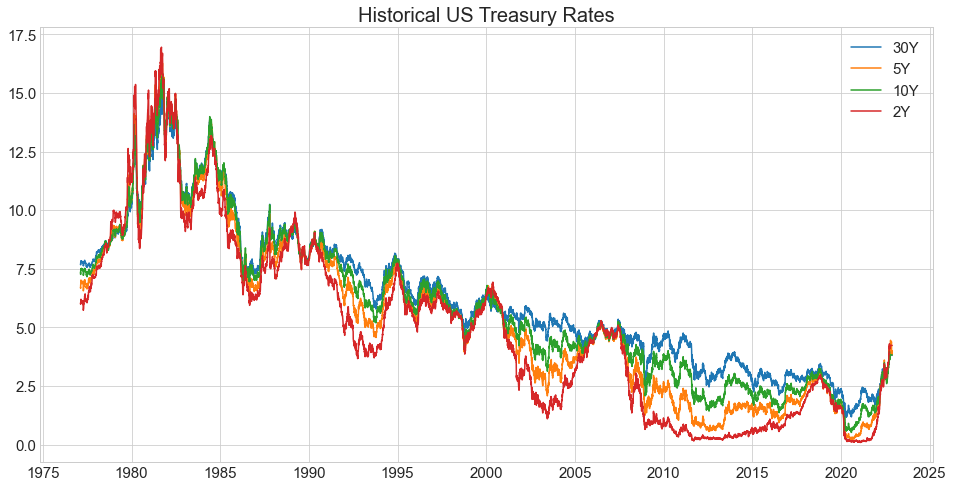

In [15]:
#Plot the lines
plt.plot(df1.DGS30,label='30Y')
plt.plot(df1.DGS5,label='5Y')
plt.plot(df1.DGS10,label='10Y')
plt.plot(df1.DGS2,label='2Y')
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
#plt.xticks(ticks=xticks, labels=xlabels,fontsize=15)
plt.title('Historical US Treasury Rates',fontsize=20)

In [16]:
#now lets calculate the differentials between the 30Y - 5Y and 10Y - Y datapoints
df1['30Y-5Y']=df1['DGS30']-df1['DGS5']
df1['10Y-2Y']=df1['DGS10']-df1['DGS2']

/var/folders/dv/wd_fn1ws4l18t7p_tt04f3d00000gn/T/ipykernel_3278/3208011138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['30Y-5Y']=df1['DGS30']-df1['DGS5']
/var/folders/dv/wd_fn1ws4l18t7p_tt04f3d00000gn/T/ipykernel_3278/3208011138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['10Y-2Y']=df1['DGS10']-df1['DGS2']


In [17]:
#check the head again
df1.head(2)

,DGS30,DGS10,DGS5,DGS2,30Y-5Y,10Y-2Y
1977-02-15,7.70,7.36,6.72,6.04,0.98,1.32
1977-02-16,7.67,7.34,6.70,6.02,0.97,1.32


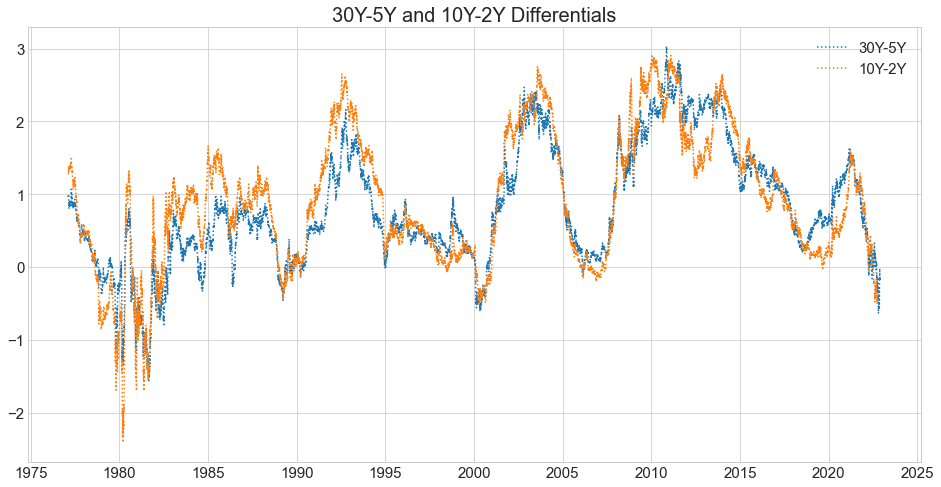

In [18]:
#now lets plot these differentials
plt.plot(df1['30Y-5Y'],':', label='30Y-5Y')
plt.plot(df1['10Y-2Y'],':', label='10Y-2Y')
plt.title('30Y-5Y and 10Y-2Y Differentials', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [19]:
#make a dataset with 30Y rate, Fed Funds rate and inflation
df2=df[['DGS30','inflation','FEDFUNDS']]
df2=df2.loc['1980':]

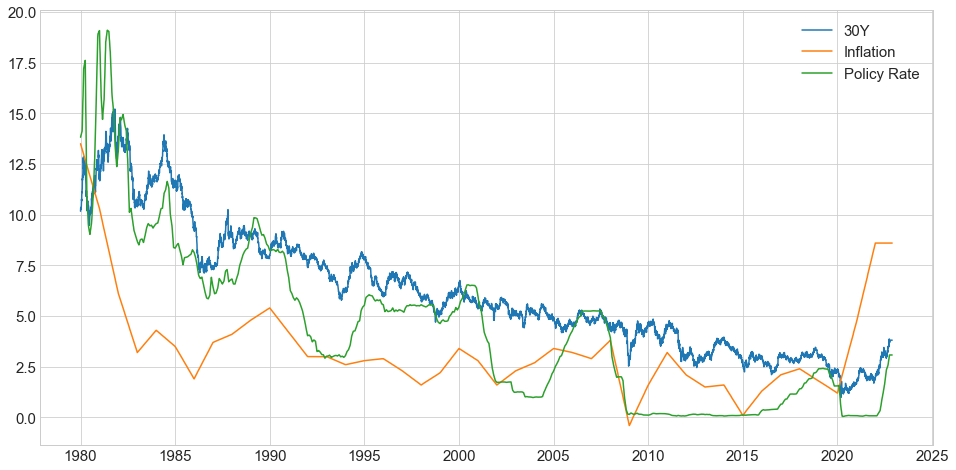

In [20]:
plt.plot(df2.DGS30, label='30Y')
plt.plot(df2.inflation, label='Inflation')
plt.plot(df2.FEDFUNDS, label='Policy Rate')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [23]:
#lets make a dataset with GDP and unemployment
df3=df[['RealGDP', 'UNRATE']].loc['1980':]

In [24]:
df3.head()

,RealGDP,UNRATE
1980-01-01,1.300000,6.3
1980-01-02,1.159091,6.3
1980-01-03,1.018182,6.3
1980-01-04,0.877273,6.3
1980-01-07,0.736364,6.3


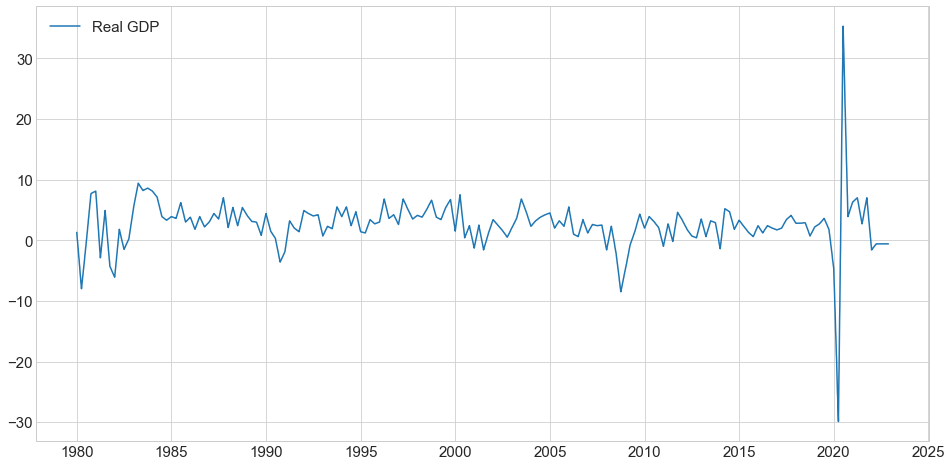

In [30]:
plt.plot(df3.RealGDP, label='Real GDP')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

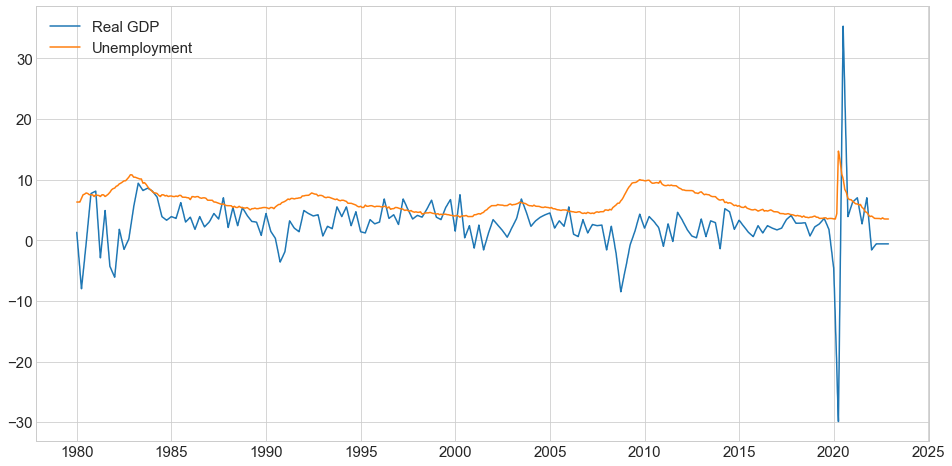

In [26]:
plt.plot(df3.RealGDP, label='Real GDP')
plt.plot(df3.UNRATE, label='Unemployment')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

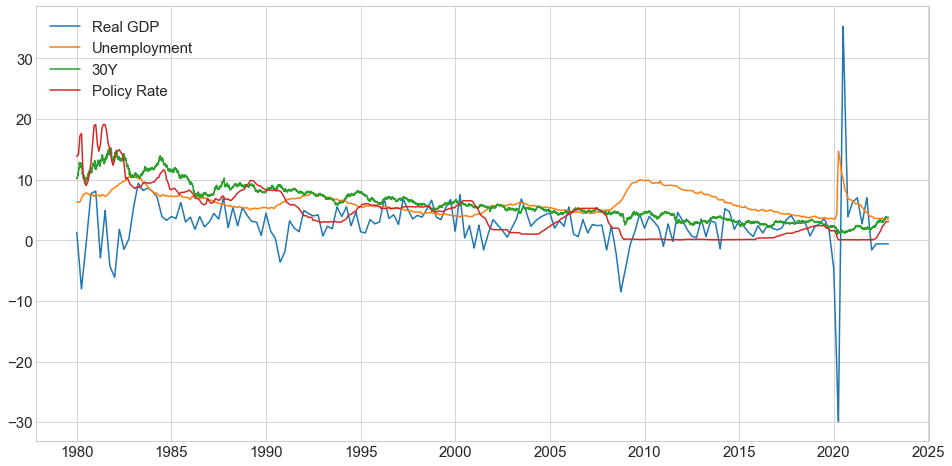

In [27]:
plt.plot(df3.RealGDP, label='Real GDP')
plt.plot(df3.UNRATE, label='Unemployment')
plt.plot(df2.DGS30, label='30Y')
plt.plot(df2.FEDFUNDS, label='Policy Rate')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [29]:
df3.RealGDP.max()

35.3